# Netflix Dataset Analysis #

## Problem Statement ##

I will be answering the following questions using analysis of the netflix titles dataset:
- How has the number of titles added to Netflix changed over time (by year)?
- Do Movies and TV Shows differ in typical duration (minutes vs. seasons) or in ratings
distribution?

## Imports & Setup ##

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

randomSeed = 0
np.random.seed(randomSeed)

dataDirectory = "../data/netflix_titles.csv"

## Data Loading & Cleaning ##

### Data Dictionary ###
- show_id: Unique identifier for each title
- type: Type of title (Movie or TV Show)
- title: Name of the title
- director: Director of the title
- cast: Cast of the title
- country: Country of the title
- date_added: Date the title was added to Netflix
- release_year: Year the title was released
- rating: Rating of the title
- duration: Duration of the title
- listed_in: Genres of the title
- description: Description of the title

#### Data Cleaning Function ####

In [ ]:
def cleanData(df):
    # Remove duplicates
    df = df.drop_duplicates()

    # Handle missing values
    df["director"] = df["director"].fillna("Unknown")
    df["cast"] = df["cast"].fillna("Unknown")
    df["country"] = df["country"].fillna("Unknown")

    # Drop rows where 'rating' is missing
    df = df.dropna(subset=['rating'])

    # Drop rows where 'date_added' is missing
    df = df.dropna(subset=['date_added'])

    # Fix Data Types
    df["date_added"] = pd.to_datetime(df["date_added"].str.strip(), errors='coerce')

    return df

In [9]:
df = pd.read_csv(dataDirectory)
df = cleanData(df)


## Trend Over Time: Titles Added ##

### Question: How has the number of titles added to Netflix changed over time? ###

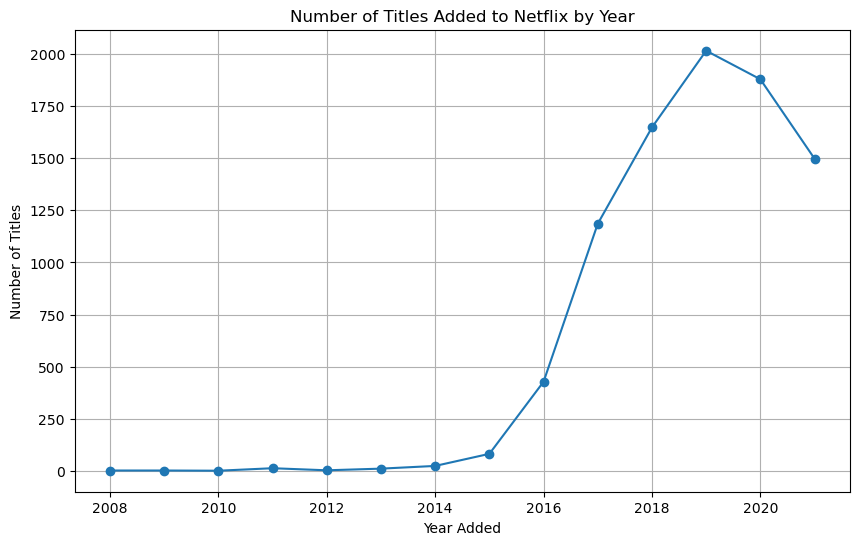

In [10]:
# Extract year from date_added
df['year_added'] = df['date_added'].dt.year

# Count titles per year
titles_per_year = df.groupby('year_added').size()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(titles_per_year.index, titles_per_year.values, marker='o', linestyle='-')
plt.title('Number of Titles Added to Netflix by Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

### Interpretation ###

The plot shows a significant increase in the number of titles added to Netflix starting around 2015, peaking around 2019-2020. There is a drop-off in recent years, which could be due to data collection cutoff or a change in content strategy.

## Comparison of Two Groups: Duration (Movies vs TV Shows) ##

### Question: Do Movies and TV Shows differ in typical duration? ###

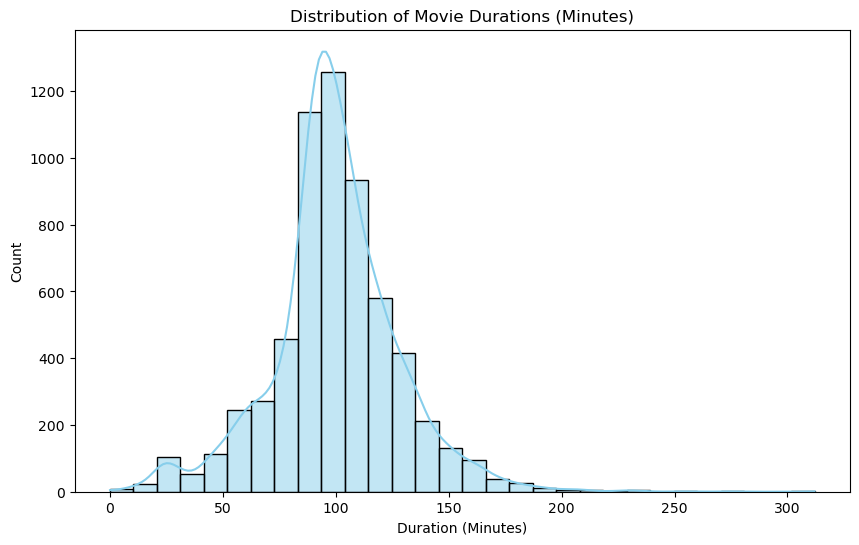

In [ ]:
# Helper to parse duration
def parse_duration(val):
    if pd.isna(val):
        return 0
    try:
        value, unit = val.split(' ', 1)
        return int(value)
    except:
        return 0

df['duration_val'] = df['duration'].apply(parse_duration)

movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Visualize Movie Duration
plt.figure(figsize=(10, 6))
sns.histplot(movies['duration_val'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations (Minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count')
plt.show()

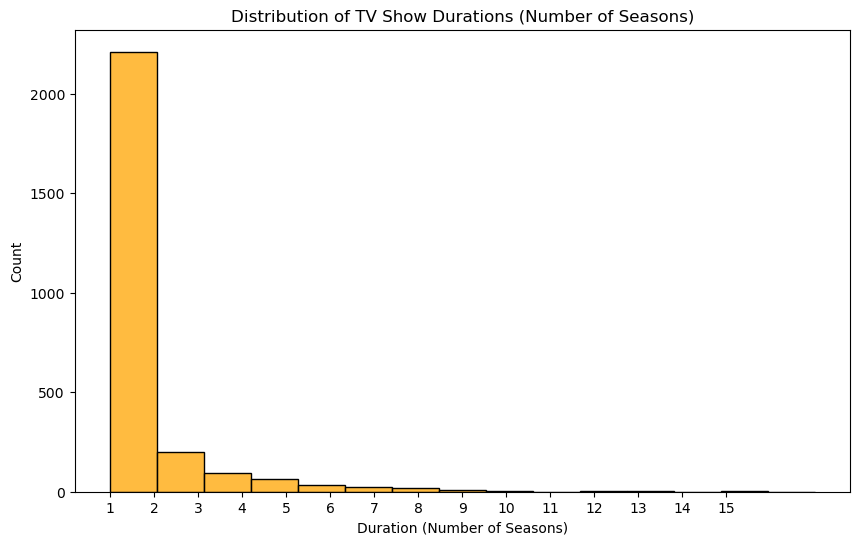

In [12]:
# Visualize TV Show Duration (Number of Seasons)
plt.figure(figsize=(10, 6))
sns.histplot(tv_shows['duration_val'], bins=15, kde=False, color='orange')
plt.title('Distribution of TV Show Durations (Number of Seasons)')
plt.xlabel('Duration (Number of Seasons)')
plt.ylabel('Count')
plt.xticks(range(1, 16)) # Show 1-15 seasons clearly
plt.show()

### Interpretation ###

Movies on Netflix have a normal-like distribution centered around 90-100 minutes. TV Shows are predominantly 1 season long, with a sharp decline in frequency as the number of seasons increases.

## 5. Analysis: Ratings Distribution ##

### Question: How do ratings differ between Movies and TV Shows? ###

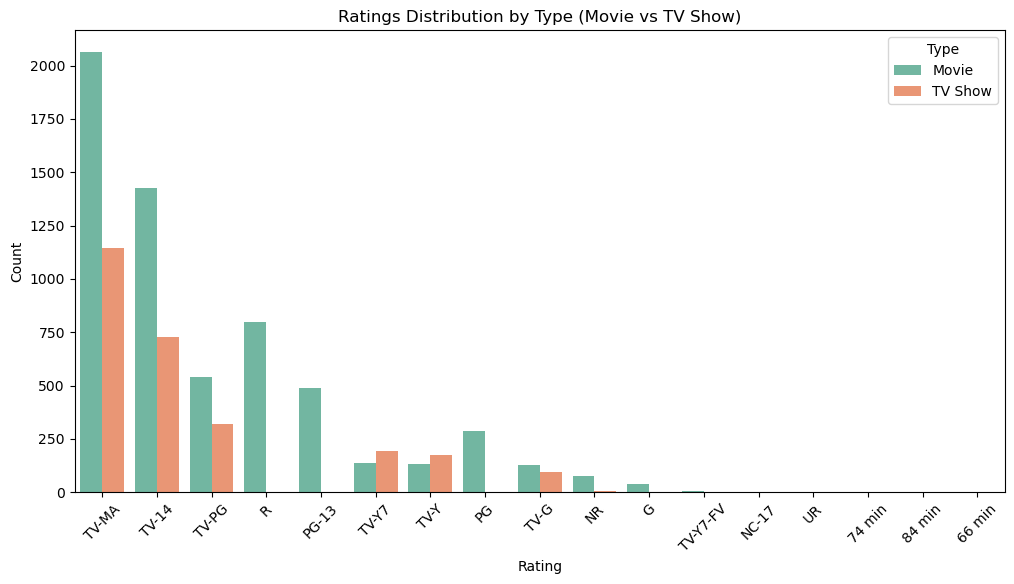

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index, palette='Set2')
plt.title('Ratings Distribution by Type (Movie vs TV Show)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

### Interpretation ###

TV-MA and TV-14 are the most common ratings for both Movies and TV Shows, indicating a focus on mature and teen audiences. Movies have a wider variety of ratings represented in high numbers compared to TV Shows.